In [1]:
import os
import cv2
from matplotlib import pyplot as plt

# Define paths
input_folder = 'Yolo format/obj_train_data'  # Change this to your input folder path
output_folder = os.path.join(input_folder, 'new_output')
obj_names_path = 'Yolo format/obj.names'  # Change this to your obj_names file path

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to read class labels from obj_names file
def read_class_labels(obj_names_path):
    with open(obj_names_path, 'r') as file:
        class_labels = file.read().splitlines()
    # Exchange class labels to meet the requirement
    class_labels[0], class_labels[1] = class_labels[1], class_labels[0]
    return class_labels

# Function to draw bounding boxes and labels on the image
def draw_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
            class_id = int(class_id)
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))
            x_max = int(x_center + (box_width / 2))
            y_max = int(y_center + (box_width / 2))

            # Draw the rectangle on the image
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Put class label text on the image
            label = class_labels[class_id]
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

# Read class labels from obj_names file
class_labels = read_class_labels(obj_names_path)

# Process each image and its corresponding annotation
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            annotated_image = draw_bounding_boxes(image_path, annotation_path, class_labels)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, annotated_image)
            print(f'Saved annotated image: {output_path}')

print('Processing complete.')

Saved annotated image: Yolo format/obj_train_data\new_output\frame_000000.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000001.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000002.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000003.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000004.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000005.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000006.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000007.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000008.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000009.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000010.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000011.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\fra

In [39]:
# Create separate folders for each class if they don't exist
motorcycle_folder = os.path.join(output_folder, 'motorcycles')
saloon_cars_folder = os.path.join(output_folder, 'saloon_cars')

if not os.path.exists(motorcycle_folder):
    os.makedirs(motorcycle_folder)

if not os.path.exists(saloon_cars_folder):
    os.makedirs(saloon_cars_folder)

# Function to crop and save image patches
def crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, count):
    cropped_image = image[y_min:y_max, x_min:x_max]
    if class_id == 0:
        output_path = os.path.join(motorcycle_folder, f'motorcycle_{count}_{filename}')
    elif class_id == 1:
        output_path = os.path.join(saloon_cars_folder, f'saloon_cars_{count}_{filename}')
    cv2.imwrite(output_path, cropped_image)
    print(f'Saved cropped image: {output_path}')

# Initialize a counter for each class to ensure unique filenames
motorcycles_count = 0
saloon_cars_count = 0

# Process each image and its corresponding annotation to crop and save patches
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            image = cv2.imread(image_path)
            height, width, _ = image.shape

            with open(annotation_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
                    class_id = int(class_id)
                    x_center *= width
                    y_center *= height
                    box_width *= width
                    box_height *= height

                    x_min = int(x_center - (box_width / 2))
                    y_min = int(y_center - (box_height / 2))
                    x_max = int(x_center + (box_width / 2))
                    y_max = int(y_center + (box_width / 2))

                    # Crop and save the image patch
                    if class_id == 0:
                        motorcycles_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, motorcycles_count)
                    elif class_id == 1:
                        saloon_cars_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, saloon_cars_count)

print('Cropping and saving complete.')


Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_1_frame_000000.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_2_frame_000000.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_3_frame_000001.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_4_frame_000001.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_5_frame_000002.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_6_frame_000002.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_7_frame_000003.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_8_frame_000003.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars_9_frame_000004.PNG
Saved cropped image: Yolo format/obj_train_data\new_output\saloon_cars\saloon_cars

In [130]:
import os
import cv2

# Define paths
input_folder = 'Yolo format/obj_train_data'  # Change this to your input folder path
output_folder = os.path.join(input_folder, 'new_output')
obj_names_path = 'Yolo format/obj.names'  # Change this to your obj_names file path

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to read class labels from obj_names file
def read_class_labels(obj_names_path):
    with open(obj_names_path, 'r') as file:
        class_labels = file.read().splitlines()
    # Ensure "saloon cars" is first and "motorcycles" is second
    if class_labels[0] != "saloon cars":
        class_labels[0], class_labels[1] = class_labels[1], class_labels[0]
    return class_labels

# Function to draw bounding boxes and labels on the image
def draw_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
            class_id = int(class_id)
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))
            x_max = int(x_center + (box_width / 2))
            y_max = int(y_center + (box_width / 2))

            # Draw the rectangle on the image
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Put class label text on the image
            label = class_labels[class_id]
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

# Read class labels from obj_names file
class_labels = read_class_labels(obj_names_path)

# Process each image and its corresponding annotation
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            annotated_image = draw_bounding_boxes(image_path, annotation_path, class_labels)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, annotated_image)
            print(f'Saved annotated image: {output_path}')

print('Processing complete.')

# Create separate folders for each class if they don't exist
saloon_cars_folder = os.path.join(output_folder, 'saloon_cars')
motorcycles_folder = os.path.join(output_folder, 'motorcycles')

if not os.path.exists(saloon_cars_folder):
    os.makedirs(saloon_cars_folder)

if not os.path.exists(motorcycles_folder):
    os.makedirs(motorcycles_folder)

# Function to crop and save image patches
def crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, count):
    cropped_image = image[y_min:y_max, x_min:x_max]
    if class_id == 0:
        output_path = os.path.join(saloon_cars_folder, f'saloon_cars_{count}_{filename}')
    elif class_id == 1:
        output_path = os.path.join(motorcycles_folder, f'motorcycles_{count}_{filename}')
    cv2.imwrite(output_path, cropped_image)
    print(f'Saved cropped image: {output_path}')

# Initialize a counter for each class to ensure unique filenames
saloon_cars_count = 0
motorcycles_count = 0

# Process each image and its corresponding annotation to crop and save patches
for filename in os.listdir(input_folder):
    if filename.endswith('.PNG'):
        image_path = os.path.join(input_folder, filename)
        annotation_path = os.path.join(input_folder, filename.replace('.PNG', '.txt'))

        if os.path.exists(annotation_path):
            image = cv2.imread(image_path)
            height, width, _ = image.shape

            with open(annotation_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
                    class_id = int(class_id)
                    x_center *= width
                    y_center *= height
                    box_width *= width
                    box_height *= height

                    x_min = int(x_center - (box_width / 2))
                    y_min = int(y_center - (box_height / 2))
                    x_max = int(x_center + (box_width / 2))
                    y_max = int(y_center + (box_width / 2))

                    # Crop and save the image patch
                    if class_id == 0:
                        saloon_cars_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, saloon_cars_count)
                    elif class_id == 1:
                        motorcycles_count += 1
                        crop_and_save(image, class_id, x_min, y_min, x_max, y_max, filename, motorcycles_count)

print('Cropping and saving complete.')


Saved annotated image: Yolo format/obj_train_data\new_output\frame_000000.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000001.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000002.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000003.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000004.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000005.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000006.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000007.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000008.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000009.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000010.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\frame_000011.PNG
Saved annotated image: Yolo format/obj_train_data\new_output\fra

In [41]:
import os
import cv2
import numpy as np

# Define paths
dataset_folder = os.path.join(output_folder, 'dataset')

# Create the dataset folder if it doesn't exist
if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

# Create separate folders for each class in the dataset folder
dataset_saloon_cars_folder = os.path.join(dataset_folder, 'saloon_cars')
dataset_motorcycles_folder = os.path.join(dataset_folder, 'motorcycles')

if not os.path.exists(dataset_saloon_cars_folder):
    os.makedirs(dataset_saloon_cars_folder)

if not os.path.exists(dataset_motorcycles_folder):
    os.makedirs(dataset_motorcycles_folder)

# Function to preprocess images
def preprocess_and_save(input_folder, output_folder, class_name):
    for filename in os.listdir(input_folder):
        if filename.endswith('.PNG'):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (224, 224))  # Resize to 224x224 pixels
            normalized_image = resized_image / 255.0  # Scale pixel values to between 0 and 1

            # Save the processed image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, (normalized_image * 255).astype(np.uint8))  # Convert back to uint8
            print(f'Saved processed image: {output_path}')

# Preprocess and save images for each class
preprocess_and_save(saloon_cars_folder, dataset_saloon_cars_folder, 'saloon_cars')
preprocess_and_save(motorcycles_folder, dataset_motorcycles_folder, 'motorcycles')

print('Preprocessing complete.')


Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1000_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1000_frame_001076.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1001_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1001_frame_001077.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1002_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1002_frame_001078.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1003_frame_000208.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars\saloon_cars_1003_frame_001079.PNG
Saved processed image: Yolo format/obj_train_data\new_output\dataset\saloon_cars

In [2]:
# loading the Dataset pipeline using kera library
import tensorflow as tf
dataset_new = tf.keras.utils.image_dataset_from_directory('Yolo format/dataset',batch_size = 32,image_size = (224,224))

Found 7037 files belonging to 2 classes.


In [3]:
data_iterator=dataset_new.as_numpy_iterator()

In [4]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001C362117FB0>)

In [5]:
batch = data_iterator.next()

In [6]:
# Images represented as numpy arrays
batch[0].shape

(32, 224, 224, 3)

In [7]:
# Displaying the labels
batch[1]
# CLASS 0= motorcysles 
# CLASS 1 = saloon cars

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [8]:
#Applying the Data scaling transformation on the data pipeline
scaled_data =dataset_new.map(lambda x,y: (x/255,y)) 

In [9]:
# We have successfully scaled the images between 0 and 1
scaled_data.as_numpy_iterator().next()[0].min()

0.007843138

In [10]:
scaled_iterator=scaled_data.as_numpy_iterator()
scaled_iterator.next()

(array([[[[0.5137255 , 0.43529412, 0.30980393],
          [0.5137255 , 0.43529412, 0.30980393],
          [0.5137255 , 0.43529412, 0.30980393],
          ...,
          [0.7529412 , 0.6666667 , 0.59607846],
          [0.7529412 , 0.6666667 , 0.59607846],
          [0.7529412 , 0.6666667 , 0.59607846]],
 
         [[0.5137255 , 0.43529412, 0.30980393],
          [0.5137255 , 0.43529412, 0.30980393],
          [0.5137255 , 0.43529412, 0.30980393],
          ...,
          [0.7529412 , 0.6666667 , 0.59607846],
          [0.7529412 , 0.6666667 , 0.59607846],
          [0.7529412 , 0.6666667 , 0.59607846]],
 
         [[0.5137255 , 0.43529412, 0.30980393],
          [0.5137255 , 0.43529412, 0.30980393],
          [0.5137255 , 0.43529412, 0.30980393],
          ...,
          [0.7529412 , 0.6666667 , 0.59607846],
          [0.7529412 , 0.6666667 , 0.59607846],
          [0.7529412 , 0.6666667 , 0.59607846]],
 
         ...,
 
         [[1.        , 1.        , 0.9843137 ],
          [1.     

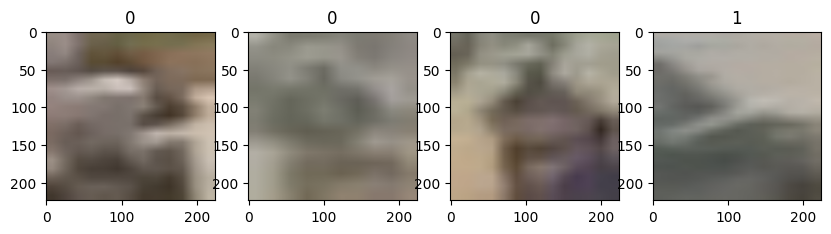

In [11]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
# Splitting the dataset into training and validation sets 
len(scaled_data)

220

In [13]:
train_size = int(0.8 * len(scaled_data))
test_size = int(0.2 * len(scaled_data))

In [14]:
train_size 

176

In [15]:
test_size

44

In [16]:
train =scaled_data.take(train_size)
test=scaled_data.skip(test_size).take(test_size)

In [17]:
len(train)

176

In [18]:
len(test)

44

In [22]:
#  CNN MODEL BUILDING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, kernel_size=(3, 3),  activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# compile the model
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,121 (10.60 MB)

 Trainable params: 2,779,121 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
 logdir = 'Yolo format/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist= model.fit(train, validation_data=test, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 247ms/step - accuracy: 0.7836 - loss: 0.4464 - val_accuracy: 0.9595 - val_loss: 0.1352
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 205ms/step - accuracy: 0.9488 - loss: 0.1632 - val_accuracy: 0.9616 - val_loss: 0.1158
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 255ms/step - accuracy: 0.9594 - loss: 0.1246 - val_accuracy: 0.9695 - val_loss: 0.0980
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 0.9714 - loss: 0.0973 - val_accuracy: 0.9766 - val_loss: 0.0779
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 206ms/step - accuracy: 0.9732 - loss: 0.0822 - val_accuracy: 0.9808 - val_loss: 0.0579


In [30]:
# plot performance
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'blue',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

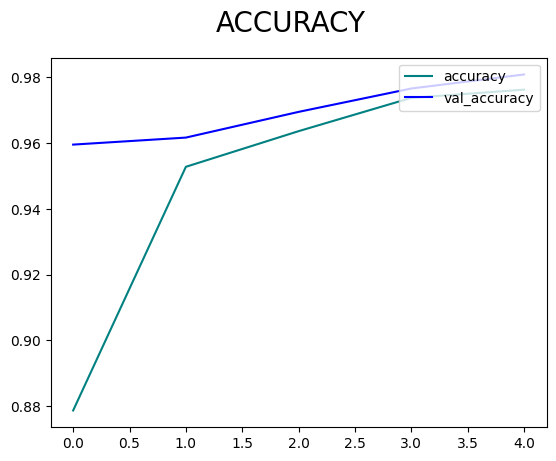

In [31]:
# plot performance
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'blue',label = 'val_accuracy')
fig.suptitle('ACCURACY',fontsize=20)
plt.legend(loc='upper right')
plt.show()  

In [34]:
#Model evalaution
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [35]:
Pre = Precision()
Rec = Recall()
Acc=BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    Pre.update_state(y,y_pred)
    Rec.update_state(y,y_pred)
    Acc.update_state(y,y_pred)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Precision:0.8888888955116272,Recall:1.0,Accuracy:0.96875,F1_SCORE:0.9411765039998364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Precision:0.9411764740943909,Recall:0.9411764740943909,Accuracy:0.96875,F1_SCORE:0.9411764966652673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Precision:0.9615384340286255,Recall:0.9259259104728699,Accuracy:0.96875,F1_SCORE:0.9433962109234029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Precision:0.9714285731315613,Recall:0.9189189076423645,Accuracy:0.96875,F1_SCORE:0.9444444304306435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Precision:0.9534883499145508,Recall:0.9318181872367859,Accuracy:0.96875,F1_SCORE:0.9425287152820678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Precision:0.9399999976158142,Recall:0.9399999976158142,Accuracy:0.96875,F1_SCORE:0.939999998731816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Precision:0.9508196711540222,Recall:0.9508196711540222,Accuracy:0.9732142686843872,F1_SCORE:0.9508196628821509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [37]:
#BUILDING AN LNET5 CNN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the LeNet-5 architecture
model3 = Sequential()

# C1: Convolutional Layer
model3.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3), padding='same'))

# S2: Average Pooling Layer
model3.add(AveragePooling2D(pool_size=(2, 2)))

# C3: Convolutional Layer
model3.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same'))

# S4: Average Pooling Layer
model3.add(AveragePooling2D(pool_size=(2, 2)))

# C5: Convolutional Layer (typically in LeNet-5 this layer is fully connected but we'll use Conv2D to match the input shape)
model3.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))

# Flatten the feature maps
model3.add(Flatten())

# C5: Fully Connected Layer
model3.add(Dense(120, activation='relu'))

# F6: Fully Connected Layer
model3.add(Dense(84, activation='relu'))

# Output Layer
model3.add(Dense(1, activation='sigmoid'))  # Use 'softmax' and adjust units for multi-class classification

# Compile the model
model3.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
# Print the model summary
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 112, 112, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 56, 56, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 324480)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │    38,937,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,998,961 (148.77 MB)

 Trainable params: 38,998,961 (148.77 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Train the LNET5 model
hist3 = model3.fit(train, validation_data=test, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 88s 492ms/step - accuracy: 0.7425 - loss: 0.5486 - val_accuracy: 0.9439 - val_loss: 0.1780
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 68s 384ms/step - accuracy: 0.9402 - loss: 0.1882 - val_accuracy: 0.9624 - val_loss: 0.1329
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 72s 408ms/step - accuracy: 0.9532 - loss: 0.1388 - val_accuracy: 0.9702 - val_loss: 0.0934
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 70s 395ms/step - accuracy: 0.9627 - loss: 0.1168 - val_accuracy: 0.9709 - val_loss: 0.0842
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 67s 381ms/step - accuracy: 0.9668 - loss: 0.1018 - val_accuracy: 0.9716 - val_loss: 0.0802
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 67s 379ms/step - accuracy: 0.9721 - loss: 0.0828 - val_accuracy: 0.9787 - val_loss: 0.0580
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 67s 381ms/step - accuracy: 0.9749 - loss: 0.0681 - val_accuracy: 0.9787 - val_loss: 0.0570
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 67s 382ms/step - accuracy: 0.9823 - loss: 0

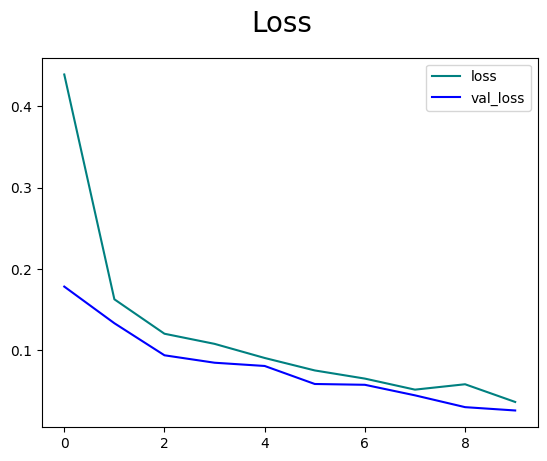

In [40]:
# plot performance of LNET5
fig = plt.figure()
plt.plot(hist3.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist3.history['val_loss'],color = 'blue',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

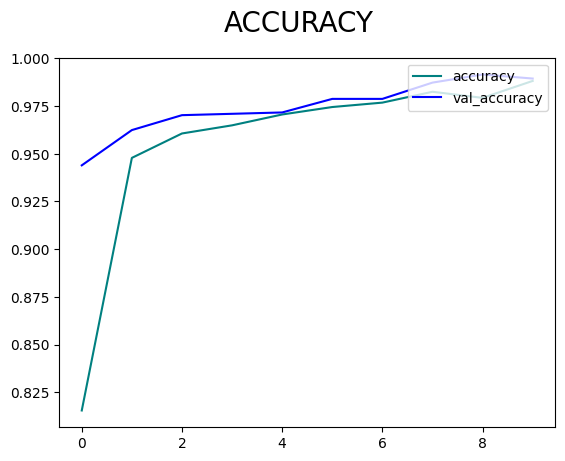

In [41]:
# plot performance of LNET5
fig = plt.figure()
plt.plot(hist3.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist3.history['val_accuracy'],color = 'blue',label = 'val_accuracy')
fig.suptitle('ACCURACY',fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [42]:
# Model Evaluation
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model3.predict(X)
    Pre.update_state(y,y_pred)
    Rec.update_state(y,y_pred)
    Acc.update_state(y,y_pred)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Precision:0.9708520174026489,Recall:0.9665178656578064,Accuracy:0.980555534362793,F1_SCORE:0.9686801540453644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Precision:0.971615731716156,Recall:0.967391312122345,Accuracy:0.98097825050354,F1_SCORE:0.9694989477774218
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Precision:0.9699570536613464,Recall:0.9678800702095032,Accuracy:0.9807180762290955,F1_SCORE:0.9689174714482673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Precision:0.9705263376235962,Recall:0.9684873819351196,Accuracy:0.9811198115348816,F1_SCORE:0.9695058155154926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Precision:0.9710144996643066,Recall:0.9690082669258118,Accuracy:0.9815050959587097,F1_SCORE:0.9700103661710117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Precision:0.9717171788215637,Recall:0.9678068161010742,Accuracy:0.981249988079071,F1_SCORE:0.9697580920258544
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Precision:0.970355749130249,Recall:0.9684418439865112,Accuracy:0.98

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

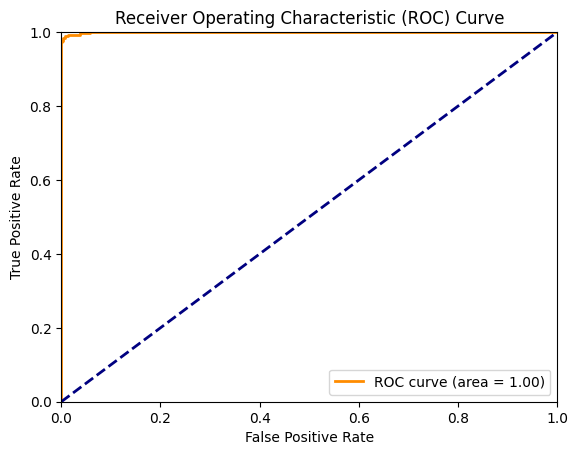

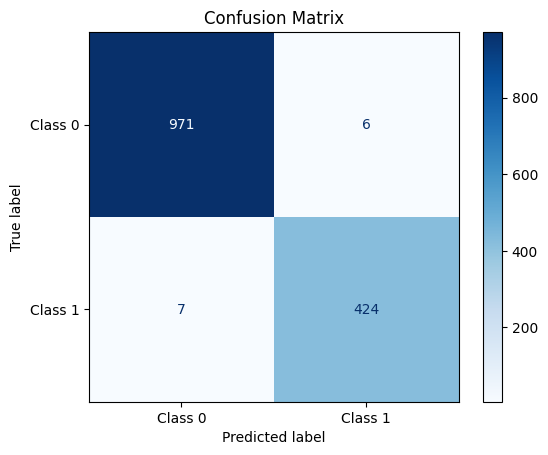

Processing complete.


In [43]:
# Compute confusion matrix FOR LENET5
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
y_true1 = []
y_pred_prob1 = []
y_pred_class = []

# Loop through your test batches
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model3.predict(X)

    # Append the true labels and predicted probabilities to the lists
    y_true1.extend(y)
    y_pred_prob1.extend(y_pred)
    
    # Convert predicted probabilities to class labels (assuming a threshold of 0.5 for binary classification)
    y_pred_class.extend(np.where(y_pred > 0.5, 1, 0))

    # Update metrics (optional, based on your existing code)
    Pre.update_state(y, y_pred)
    Rec.update_state(y, y_pred)
    Acc.update_state(y, y_pred)

# Convert lists to numpy arrays
y_true = np.array(y_true1)
y_pred_prob = np.array(y_pred_prob1)
y_pred_class = np.array(y_pred_class)

# Calculate F1 score (optional, based on your existing code)
F1_SCORE = 2 * (Pre.result().numpy() * Rec.result().numpy()) / (Pre.result().numpy() + Rec.result().numpy())

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob1)
roc_auc1 = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('Processing complete.')

In [44]:
# BUILDING A RESNET CNN
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Function to create a residual block
def residual_block(x, filters, kernel_size=3, stride=1, activation='relu'):
    y = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation(activation)(y)
    
    y = Conv2D(filters, kernel_size, strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    
    if stride != 1 or x.shape[-1] != filters:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)
    
    out = Add()([x, y])
    out = Activation(activation)(out)
    return out

# Input layer
input_layer = Input(shape=(224, 224, 3))

# Initial convolutional layer
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add residual blocks
x = residual_block(x, 64)
x = residual_block(x, 64)

x = residual_block(x, 128, stride=2)
x = residual_block(x, 128)

x = residual_block(x, 256, stride=2)
x = residual_block(x, 256)

x = residual_block(x, 512, stride=2)
x = residual_block(x, 512)

# Final layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
model4 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model4.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 112, 112,  │      9,472 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 56, 56,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ max_pooling2d_6[… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_13[0][0] 

 Total params: 17,613,953 (67.19 MB)

 Trainable params: 17,604,353 (67.16 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [45]:
# Train the RESNET model
hist3 = model4.fit(train, validation_data=test, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.8739 - loss: 3.1207 - val_accuracy: 0.7259 - val_loss: 2.2753
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.9742 - loss: 0.0891 - val_accuracy: 0.8835 - val_loss: 0.7152
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.9835 - loss: 0.0715 - val_accuracy: 0.9673 - val_loss: 0.2267
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.9814 - loss: 0.0735 - val_accuracy: 0.9936 - val_loss: 0.0212
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.9871 - loss: 0.0483 - val_accuracy: 0.9766 - val_loss: 0.0834


In [46]:
# Model Evaluation for RESNET
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred2 = model4.predict(X)
    Pre.update_state(y,y_pred2)
    Rec.update_state(y,y_pred2)
    Acc.update_state(y,y_pred2)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision:0.9803773760795593,Recall:0.9788997769355774,Accuracy:0.9873120188713074,F1_SCORE:0.9796379908793152
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
Precision:0.9804804921150208,Recall:0.9782771468162537,Accuracy:0.9871734976768494,F1_SCORE:0.9793775884366679
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
Precision:0.9805825352668762,Recall:0.976934552192688,Accuracy:0.9868055582046509,F1_SCORE:0.9787551114912242
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
Precision:0.9799554347991943,Recall:0.976331353187561,Accuracy:0.986443042755127,F1_SCORE:0.9781400629340089
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
Precision:0.9801031947135925,Recall:0.9757887125015259,Accuracy:0.9863138794898987,F1_SCORE:0.9779412221821991
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
Precision:0.9802197813987732,Recall:0.975218653678894,Accuracy:0.9861866235733032,F1_SCORE:0.9777128603657069
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
Precision:0.9803350567817688,Recall:0.9746560454368591,Accuracy:0.98

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

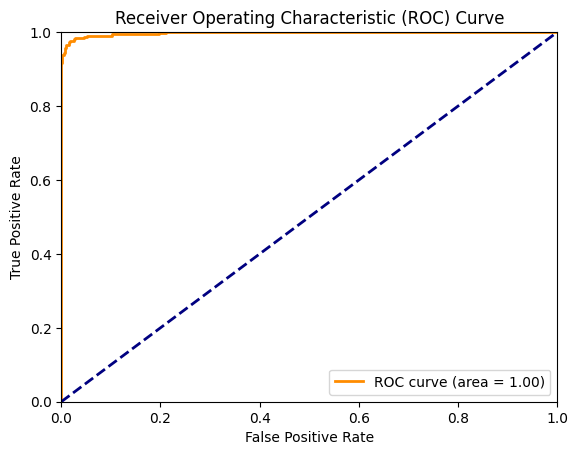

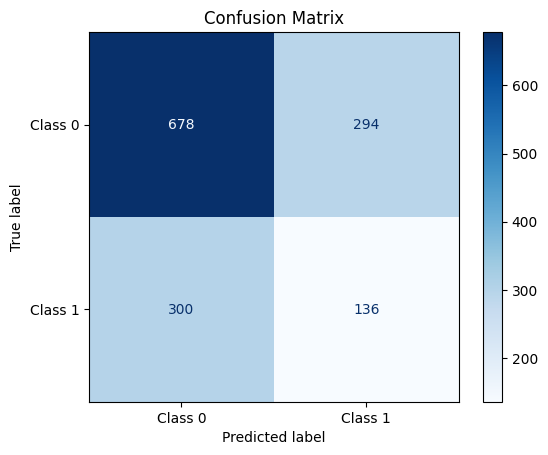

Processing complete.


In [47]:
# CONFUSION MATRIX FOR RESNET AND AUC
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
y_true = []
y_pred_prob = []
y_pred_class1 = []

# Loop through your test batches
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred2 = model4.predict(X)

    # Append the true labels and predicted probabilities to the lists
    y_true.extend(y)
    y_pred_prob.extend(y_pred2)
    
    # Convert predicted probabilities to class labels (assuming a threshold of 0.5 for binary classification)
    y_pred_class1.extend(np.where(y_pred2 > 0.5, 1, 0))

    # Update metrics (optional, based on your existing code)
    Pre.update_state(y, y_pred2)
    Rec.update_state(y, y_pred2)
    Acc.update_state(y, y_pred2)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_prob2 = np.array(y_pred_prob)
y_pred_class1 = np.array(y_pred_class)

# Calculate F1 score (optional, based on your existing code)
F1_SCORE = 2 * (Pre.result().numpy() * Rec.result().numpy()) / (Pre.result().numpy() + Rec.result().numpy())

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_class1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('Processing complete.')

In [48]:
# BUILDING A GOOGLENET CONVOLUTIONAL NEURAL NETWORK
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Model

# Function to create an inception module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Initial layers before Inception modules
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Add inception modules
x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)

# Final layers
x = AveragePooling2D((7, 7), strides=(1, 1))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
model5 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model5.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 56, 56,    │          0 │ conv2d_29[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 56, 56,    │      4,160 │ max_pooling2d_7[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 56, 56,    │    110,784 │ conv2d_30[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 28, 28,    │          0 │ conv2d_31[0][0]   │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 28, 28,    │     18,528 │ max_pooling2d_8[… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 28, 28,    │      3,088 │ max_pooling2d_8[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 28, 28,    │          0 │ max_pooling2d_8[… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 28, 28,    │     12,352 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 28, 28,    │    110,720 │ conv2d_33[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 28, 28,    │     12,832 │ conv2d_35[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 28, 28,    │      6,176 │ max_pooling2d_9[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28,    │          0 │ conv2d_32[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_34[0][0],  │
│                     │                   │            │ conv2d_36[0][0],  │
│                     │                   │            │ conv2d_37[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 28, 28,    │     32,896 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 28, 28,    │      8,224 │ concatenate[0][0] │
│                     │ 32)               │            │                 

 Total params: 7,024,177 (26.80 MB)

 Trainable params: 7,024,177 (26.80 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the GOOGLENET model
hist4 = model5.fit(train, validation_data=test, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.6779 - loss: 0.6410 - val_accuracy: 0.6939 - val_loss: 0.6169
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.6880 - loss: 0.6217 - val_accuracy: 0.6925 - val_loss: 0.6189
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.6892 - loss: 0.6228 - val_accuracy: 0.6868 - val_loss: 0.6216
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.6916 - loss: 0.6189 - val_accuracy: 0.6847 - val_loss: 0.6238
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.6888 - loss: 0.6212 - val_accuracy: 0.6896 - val_loss: 0.6197


In [50]:
# Model Evaluation
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred3 = model5.predict(X)
    Pre.update_state(y,y_pred3)
    Rec.update_state(y,y_pred3)
    Acc.update_state(y,y_pred3)
    F1_SCORE = 2*(Pre.result().numpy()*Rec.result().numpy())/(Pre.result().numpy()+Rec.result().numpy())
    print(f'Precision:{Pre.result().numpy()},Recall:{Rec.result().numpy()},Accuracy:{Acc.result().numpy()},F1_SCORE:{F1_SCORE}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Precision:0.9804741740226746,Recall:0.9625741839408875,Accuracy:0.9824660420417786,F1_SCORE:0.9714417112064557
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
Precision:0.9804741740226746,Recall:0.9586363434791565,Accuracy:0.9812781810760498,F1_SCORE:0.969432275216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Precision:0.9804741740226746,Recall:0.9542986154556274,Accuracy:0.9799607396125793,F1_SCORE:0.9672093431628368
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Precision:0.9804741740226746,Recall:0.9495722651481628,Accuracy:0.978515625,F1_SCORE:0.9647758613544085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Precision:0.9804741740226746,Recall:0.9444693326950073,Accuracy:0.9769444465637207,F1_SCORE:0.9621350447459796
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Precision:0.9804741740226746,Recall:0.9410977363586426,Accuracy:0.9759402871131897,F1_SCORE:0.9603824951855892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Precision:0.9804741740226746,Recall:0.9394209384918213,Accuracy:0.975495576

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

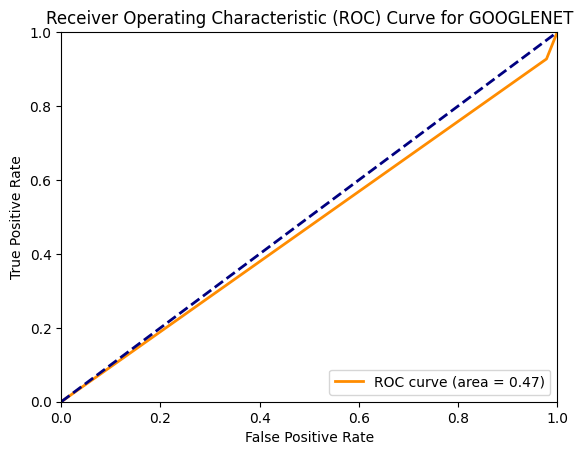

In [51]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
y_true = []
y_pred_prob = []

# Loop through your test batches
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred3 = model5.predict(X)

    # Append the true labels and predicted probabilities to the lists
    y_true.extend(y)
    y_pred_prob.extend(y_pred3)

    # Update metrics (optional, based on your existing code)
    Pre.update_state(y, y_pred3)
    Rec.update_state(y, y_pred3)
    Acc.update_state(y, y_pred3)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)

# Calculate F1 score (optional, based on your existing code)
F1_SCORE = 2 * (Pre.result().numpy() * Rec.result().numpy()) / (Pre.result().numpy() + Rec.result().numpy())

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GOOGLENET')
plt.legend(loc="lower right")
plt.show()


In [52]:
# YOLO implementation

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Reshape
from tensorflow.keras.models import Model

# Define input
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1470, activation='relu')(x)  # This is just an example; adjust according to your needs

# Reshape to match the YOLO output format (7x7 grid, each with B bounding boxes and C classes)
output_layer = Reshape((7, 7, 30))(x)  # Example with 2 bounding boxes and 20 classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │    18,878,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1470)           │     6,022,590 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 30)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,473,822 (100.99 MB)

 Trainable params: 26,473,822 (100.99 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from ultralytics import YOLO

In [7]:
# LOAD  YOLO MODEL
model = YOLO("yolov8n.yaml") # Build a new model from scratch

In [8]:
#TRAIN THE MODEL
results = model.train(data = "frank.yaml", epochs  = 5)

Ultralytics YOLOv8.2.29  Python-3.12.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1125G4 2.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=frank.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning C:\Users\HP\PycharmProjects\ComputerVision\Yolo format\data_n\labels\train.cache... 1892 images, 424 backgrounds, 0 corrupt: 100%|██████████| 2193/2193 [00:00<?, ?it/s]
val: Scanning C:\Users\HP\PycharmProjects\ComputerVision\Yolo format\data_n\labels\train.cache... 1892 images, 424 backgrounds, 0 corrupt: 100%|██████████| 2193/2193 [00:00<?, ?it/s]

Plotting labels to runs\detect\train4\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      4.158      5.197      3.494          3        640: 100%|██████████| 138/138 [1:16:18<00:00, 33.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [18:39<00:00, 16.23s/it]


                   all       2193       5000    0.00194      0.257     0.0504     0.0132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      2.158      2.504      1.925          1        640: 100%|██████████| 138/138 [55:46<00:00, 24.25s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [11:18<00:00,  9.83s/it]


                   all       2193       5000       0.73      0.485      0.578      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.736      1.841      1.549          4        640: 100%|██████████| 138/138 [35:58<00:00, 15.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [11:16<00:00,  9.80s/it]


                   all       2193       5000      0.808      0.692      0.801      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.513      1.443      1.382          2        640: 100%|██████████| 138/138 [39:55<00:00, 17.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [12:50<00:00, 11.16s/it]


                   all       2193       5000       0.87      0.736      0.857       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G       1.41      1.265      1.303          1        640: 100%|██████████| 138/138 [42:05<00:00, 18.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [12:34<00:00, 10.93s/it]


                   all       2193       5000      0.894      0.816      0.907      0.629

5 epochs completed in 5.288 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.2.29  Python-3.12.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1125G4 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [10:36<00:00,  9.22s/it]


                   all       2193       5000      0.895      0.816      0.907      0.629
           saloon_cars       1354       2000      0.906      0.826       0.93      0.685
           motorcycles       1412       3000      0.885      0.806      0.885      0.572
Speed: 5.7ms preprocess, 271.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train4
